In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mongo import Mongo
import plotly.express as px

price_repo = Mongo(db='trading_bot', collection='stock_price')
month_revenue_repo = Mongo(db='trading_bot', collection='month_revenue')
balance_sheet_repo = Mongo(db='trading_bot', collection='balance_sheet')
income_sheet_repo = Mongo(db='trading_bot', collection='income_sheet')
cash_flow_repo = Mongo(db='trading_bot', collection='cash_flow')

price_data = price_repo.get_data_by_stock_id('1101')
# month_revenue_data = month_revenue_repo.get_data_by_stock_id('1101')
# income_sheet = income_sheet_repo.get_data_by_stock_id('1101')
# balance_sheet = balance_sheet_repo.get_data_by_stock_id('1101')
# cash_flow = cash_flow_repo.get_data_by_stock_id('1101')
# all_price_data = price_repo.get_all_data()
# all_month_revenue_data = month_revenue_repo.get_all_data()
# all_income_sheet = income_sheet_repo.get_all_data()
# all_balance_sheet = balance_sheet_repo.get_all_data()
# all_cash_flow = cash_flow_repo.get_all_data()

In [2]:
price_data[price_data['close']==0]

Timestamp stock_id  Trading_Volume  Trading_money  open  max  min  \
1049   2017-04-19     1101               0              0   0.0  0.0  0.0   
1050   2017-04-20     1101               0              0   0.0  0.0  0.0   
3670   2017-04-19     1101               0              0   0.0  0.0  0.0   
3671   2017-04-20     1101               0              0   0.0  0.0  0.0   
6291          NaN     1101               0              0   0.0  0.0  0.0   
6292          NaN     1101               0              0   0.0  0.0  0.0   
8912          NaN     1101               0              0   0.0  0.0  0.0   
8913          NaN     1101               0              0   0.0  0.0  0.0   
11536         NaN     1101               0              0   0.0  0.0  0.0   
11537         NaN     1101               0              0   0.0  0.0  0.0   

       close  spread  Trading_turnover  
1049     0.0     0.0                 0  
1050     0.0     0.0                 0  
3670     0.0     0.0                 0  
3671     0.0     0.0                 0  
6291     0.0     0.0                 0  
6292     0.0     0.0                 0  
8912     0.0     0.0                 0  
8913     0.0     0.0                 0  
11536    0.0     0.0                 0  
11537    0.0     0.0                 0

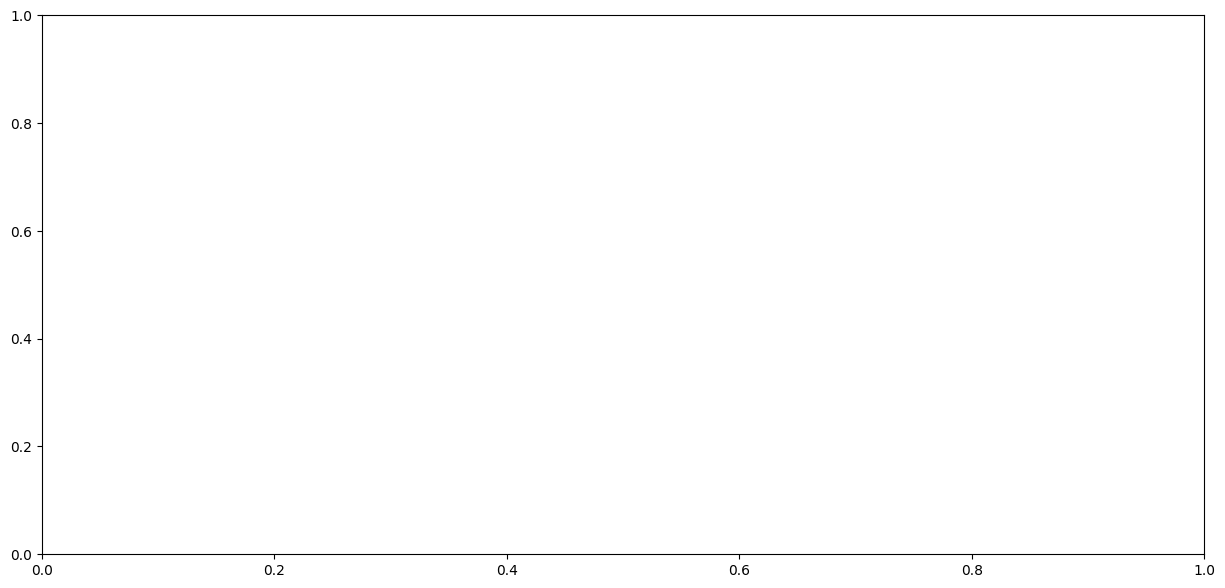

In [3]:
fig, ax = plt.subplots(figsize=(15,7))
sma30 = price_data['close'].rolling(30).mean()[29:]
sma30_std = price_data['close'].rolling(30).std()[29:]
upper_band = sma30+ 2*sma30_std
lower_band = sma30- 2*sma30_std
price = price_data['close'][29:]

# upper_band[:30].plot(ax=ax, color='black')
# lower_band[:30].plot(ax=ax, color='blue')
# sma30[:30].plot(ax=ax, color='orange')
# price[:30].plot(ax=ax, color='red')
# price_data['close'].rolling(30).mean()[120:200].plot(ax=ax, color='black')
# price_data['close'][120:200].plot(ax=ax, color='yellow')
# price_data['close'].rolling(120).mean()[120:200].plot(ax=ax, color='blue')
# upper_band.plot(ax=ax, color='black')
# lower_band.plot(ax=ax, color='blue')
# sma30.plot(ax=ax, color='orange')
# price.plot(ax=ax, color='red')
# Create a DataFrame to hold all series
df = pd.DataFrame({
    'Upper_Band': upper_band,
    'Lower_Band': lower_band,
    'SMA30': sma30,
    'Price': price
})

# Use Plotly Express to plot
fig = px.line(df)
fig.show()
# buy = price< lower_band
# buy

# sell = price > upper_band


# profit = 

In [15]:
import pandas as pd

# Assuming upper_band, lower_band, and price are Pandas Series and indexed similarly
# Creating a DataFrame to hold all these series
df = pd.DataFrame({
    'Upper_Band': upper_band,
    'Lower_Band': lower_band,
    'Price': price
})

# Initialize variables to hold buy and sell signals
df['Buy_Signal'] = False
df['Sell_Signal'] = False

# Initialize variable to hold the state of the portfolio (whether we currently hold the stock or not)
in_position = False

# Loop through DataFrame and identify buy/sell opportunities
for i in range(0, len(df)+1):
    
    # Buy Signal: When price is lower than the lower band
    if df['Price'].iloc[i] < df['Lower_Band'].iloc[i] and not in_position:
        df.at[i, 'Buy_Signal'] = True
        in_position = True  # Now you hold the stock
        
    # Sell Signal: When price is higher than the upper band
    elif df['Price'].iloc[i] > df['Upper_Band'].iloc[i] and in_position:
        df.at[i, 'Sell_Signal'] = True
        in_position = False  # You have sold the stock
df['Buy_Signal'].fillna(False, inplace=True)
df['Sell_Signal'].fillna(False, inplace=True)


# Display DataFrame (Optional)
print(df)

# Now, df['Buy_Signal'] will indicate where you should buy and df['Sell_Signal'] will indicate where you should sell
px.line(df[['Upper_Band','Lower_Band','Price']])


       Upper_Band  Lower_Band  Price Buy_Signal  Sell_Signal
29      40.353775   37.812891  37.40      False        False
30      40.364574   37.752093  38.25      False        False
31      40.368097   37.721903  38.45      False        False
32      40.376954   37.659712  38.20      False        False
33      40.407105   37.559561  37.85      False        False
...           ...         ...    ...        ...          ...
13545   48.147582   44.012418  45.50      False        False
13546   48.067750   43.985583  45.50      False        False
13547   47.895473   43.991193  45.25      False        False
13548   47.675725   44.054275  45.55      False        False
0             NaN         NaN    NaN       True        False

[13521 rows x 5 columns]


In [16]:
import plotly.express as px

# Sample DataFrame df with columns 'Price', 'Lower_Band', 'Upper_Band', 'Buy_Signal', 'Sell_Signal'

# Create a scatter plot for price
fig = px.scatter(df, x=df.index, y='Price', title='Buy and Sell Signal Plot')

# Add line plot for upper and lower bands
fig.add_scatter(x=df.index, y=df['Upper_Band'], mode='lines', name='Upper Band')
fig.add_scatter(x=df.index, y=df['Lower_Band'], mode='lines', name='Lower Band')

# Filter out buy and sell signals from df
buy_signals = df[df['Buy_Signal']]
sell_signals = df[df['Sell_Signal']]

# Add buy signals to the plot
fig.add_scatter(x=buy_signals.index, y=buy_signals['Price'], mode='markers', marker=dict(size=10, color='green'), name='Buy Signal')

# Add sell signals to the plot
fig.add_scatter(x=sell_signals.index, y=sell_signals['Price'], mode='markers', marker=dict(size=10, color='red'), name='Sell Signal')

# Show plot
fig.show()
